In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import statistics
import arviz as az
import seaborn as sns
import scipy.stats as st
import pymc as pm
import xarray as xr
import warnings

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

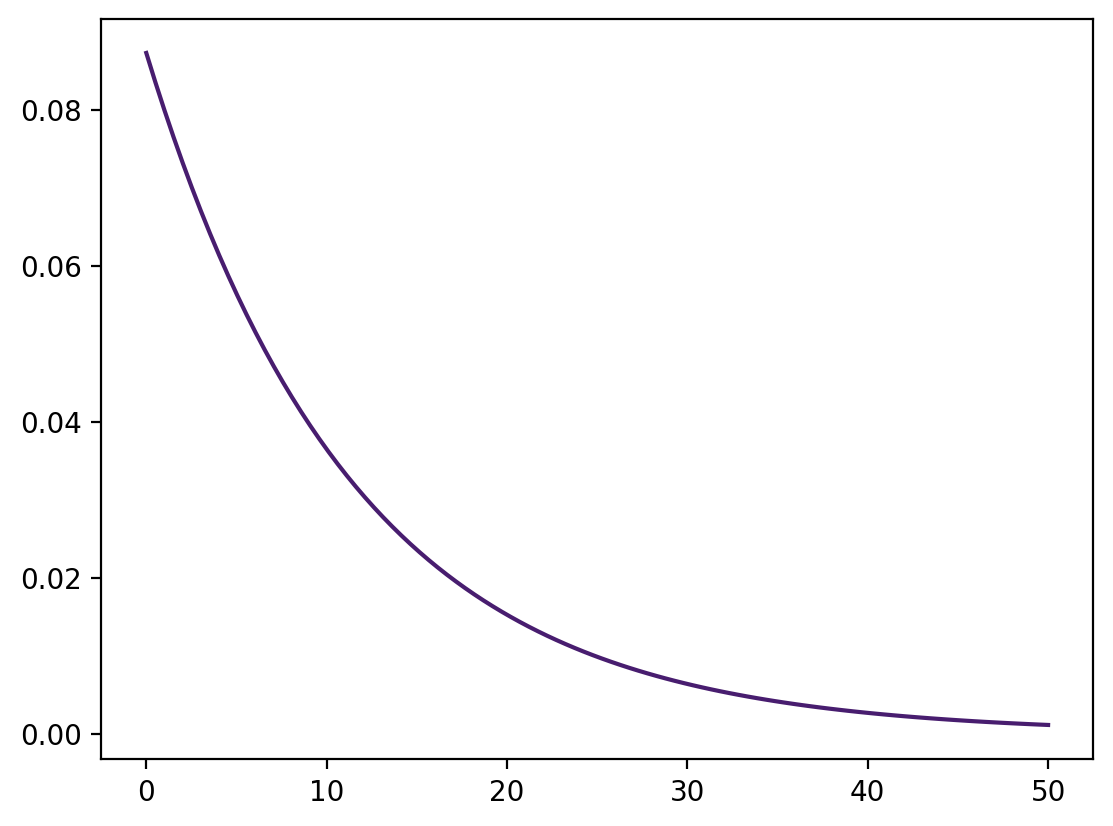

In [3]:
x = np.linspace (0, 50, 100) 
y = st.expon.pdf(x, 0, 11.46)
plt.plot(x, y);

In [4]:
r = st.expon.rvs(0, 11.46, size=100000)
r.mean()

11.460324574445668

In [5]:
l = 1/11.46

with pm.Model() as model:
    mu = pm.Exponential("mu", l)
    idata = pm.sample_prior_predictive(samples=10000, random_seed=rng)

Sampling: [mu]


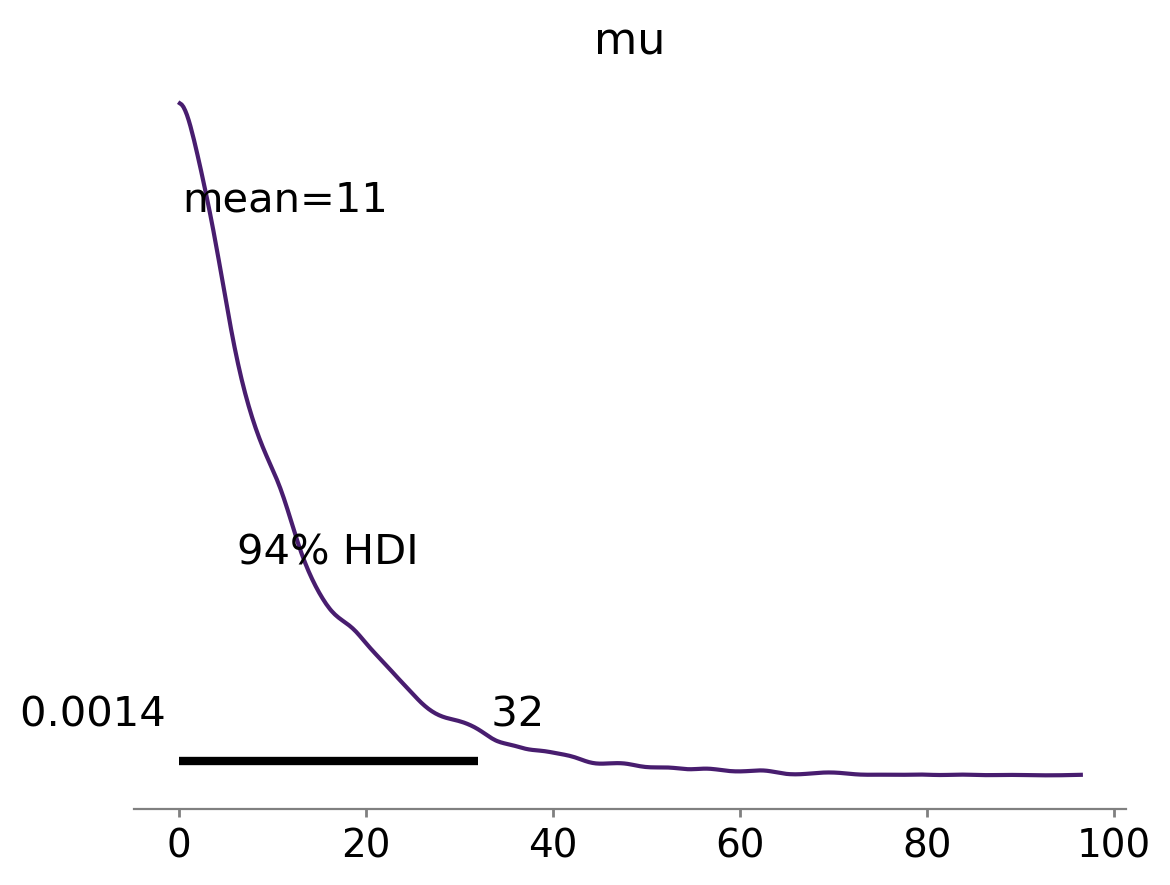

In [6]:
_ = az.plot_posterior(idata.prior.mu);

In [7]:
with pm.Model() as model:
    mu = pm.Exponential("mu", l)
    episodes = pm.Poisson("episodes", mu, observed=8)
    idata2 = pm.sample(2000)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [mu]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


In [8]:
sample_posterior = idata2.posterior['mu']

<Axes: title={'center': 'mu'}>

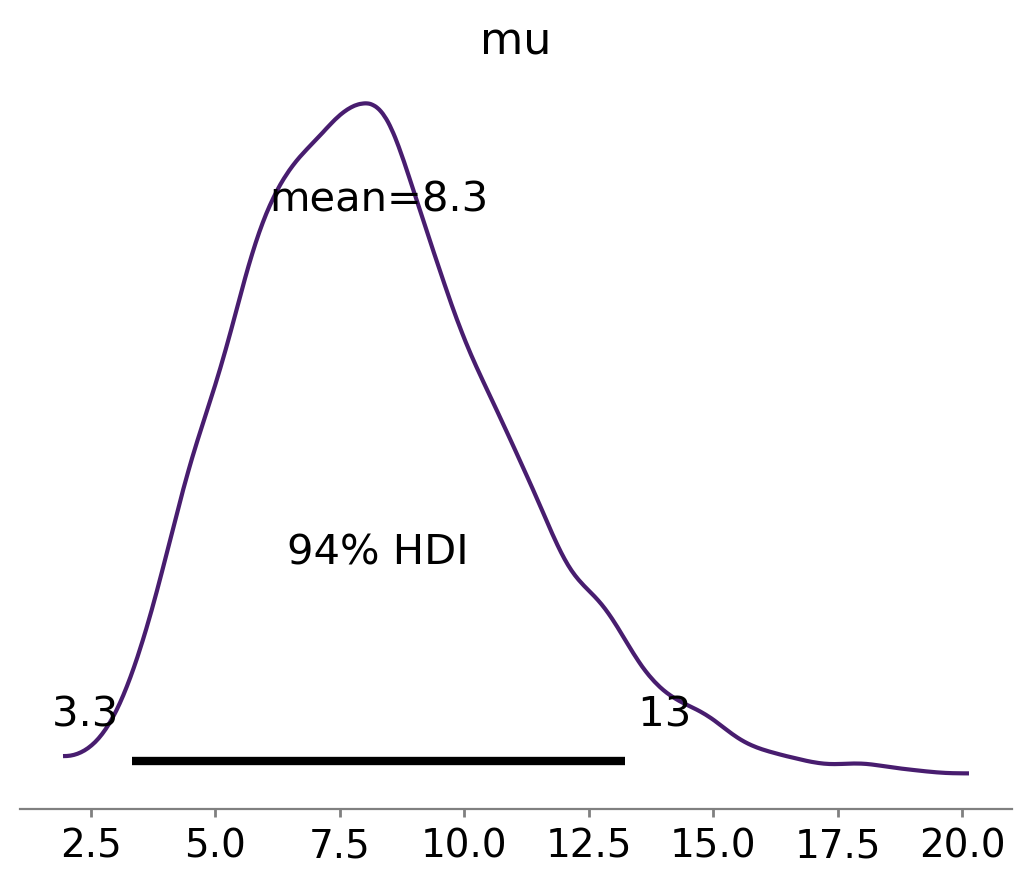

In [9]:
az.plot_posterior(sample_posterior)

In [10]:
with pm.Model() as model3:
    mu_A = pm.Exponential("mu_A", l)
    mu_B = pm.Exponential("mu_B", l)
    episodes_A = pm.Poisson("episodes_A", mu_A, observed=[8])
    episodes_B = pm.Poisson("episodes_B", mu_B, observed=[12])
    idata3 = pm.sample(2000)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [mu_A, mu_B]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


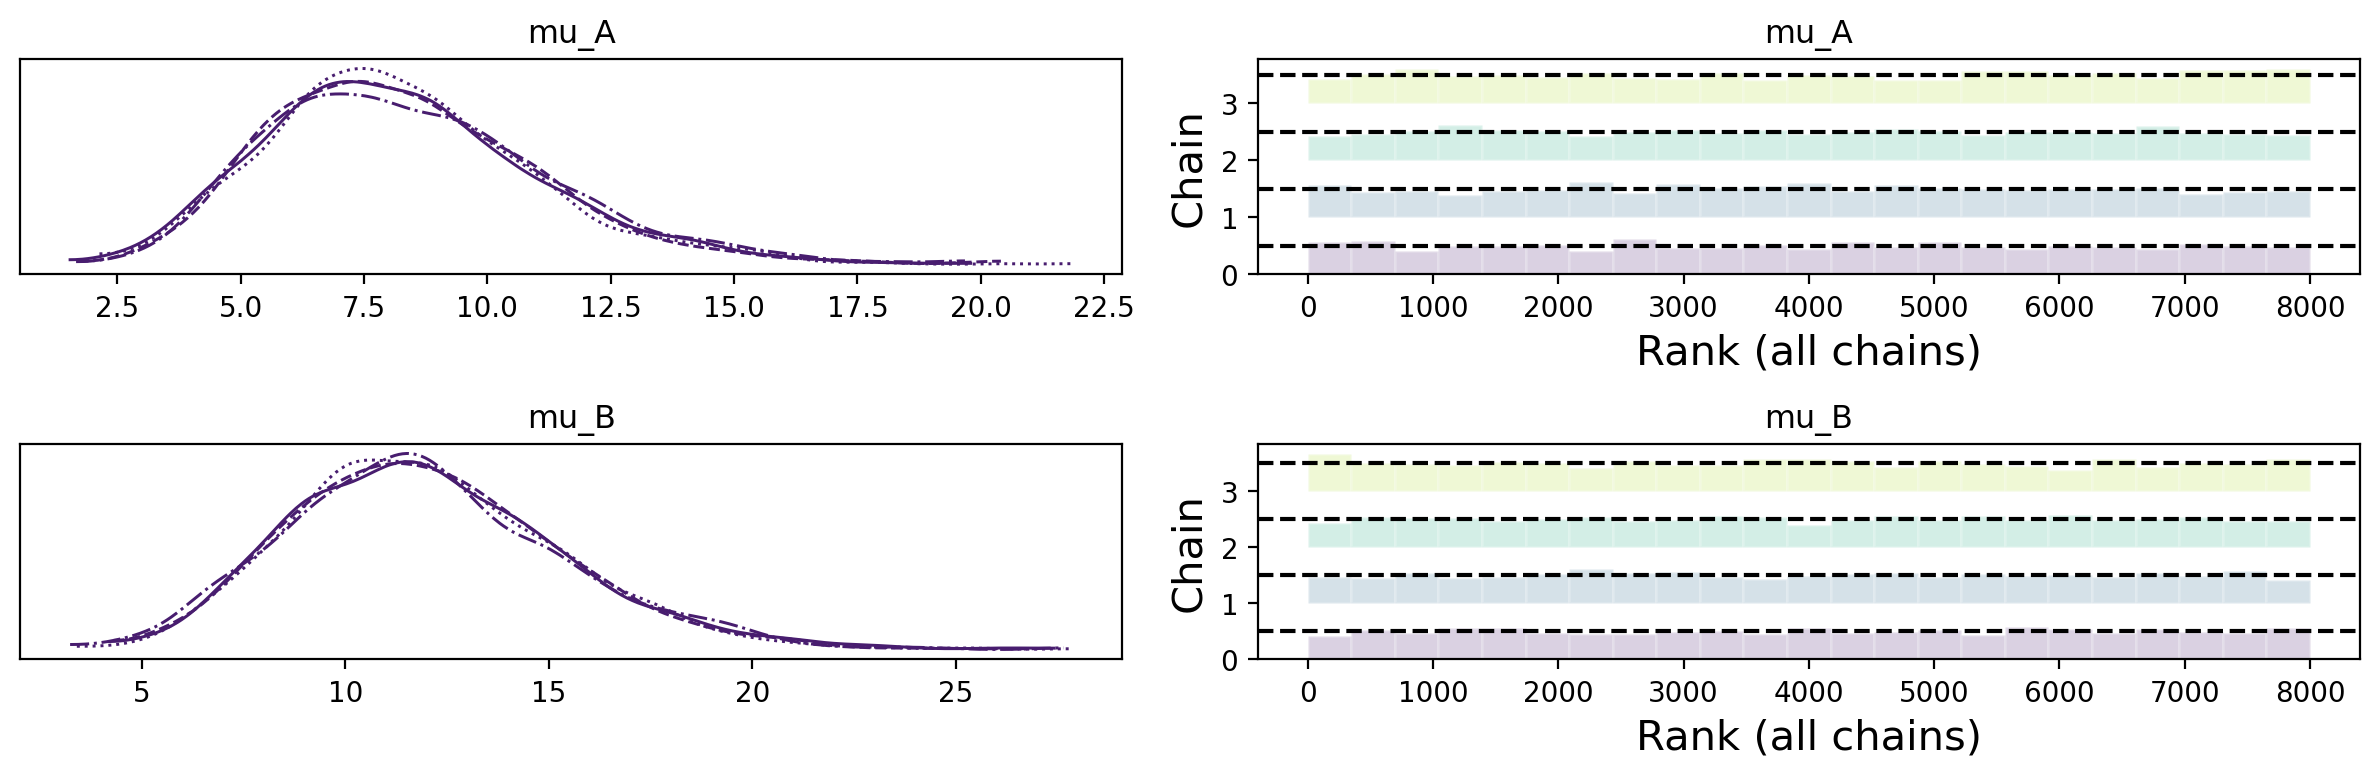

In [11]:
with model3:
    az.plot_trace(idata3, kind="rank_bars")
plt.tight_layout()

In [12]:
mu_A = idata3.posterior['mu_A']
mu_B = idata3.posterior['mu_B']
mu_B.mean(), mu_A.mean()

(<xarray.DataArray 'mu_B' ()> Size: 8B
 array(11.988072),
 <xarray.DataArray 'mu_A' ()> Size: 8B
 array(8.28922652))

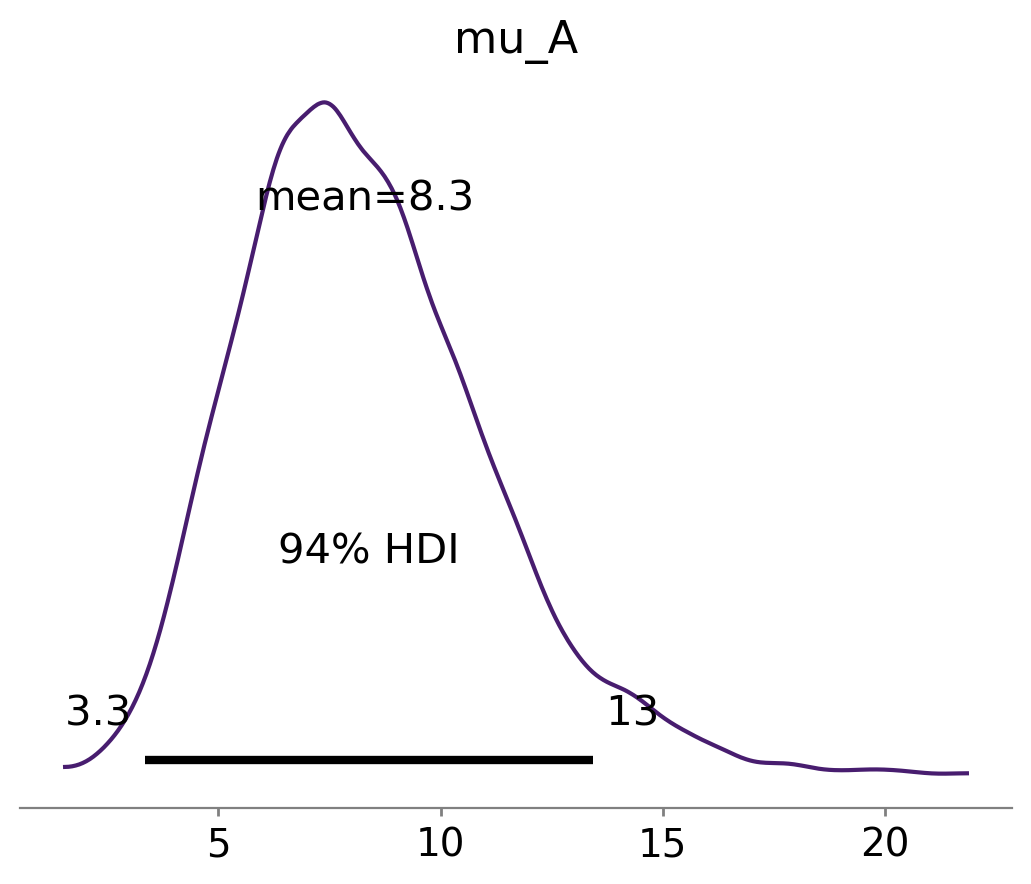

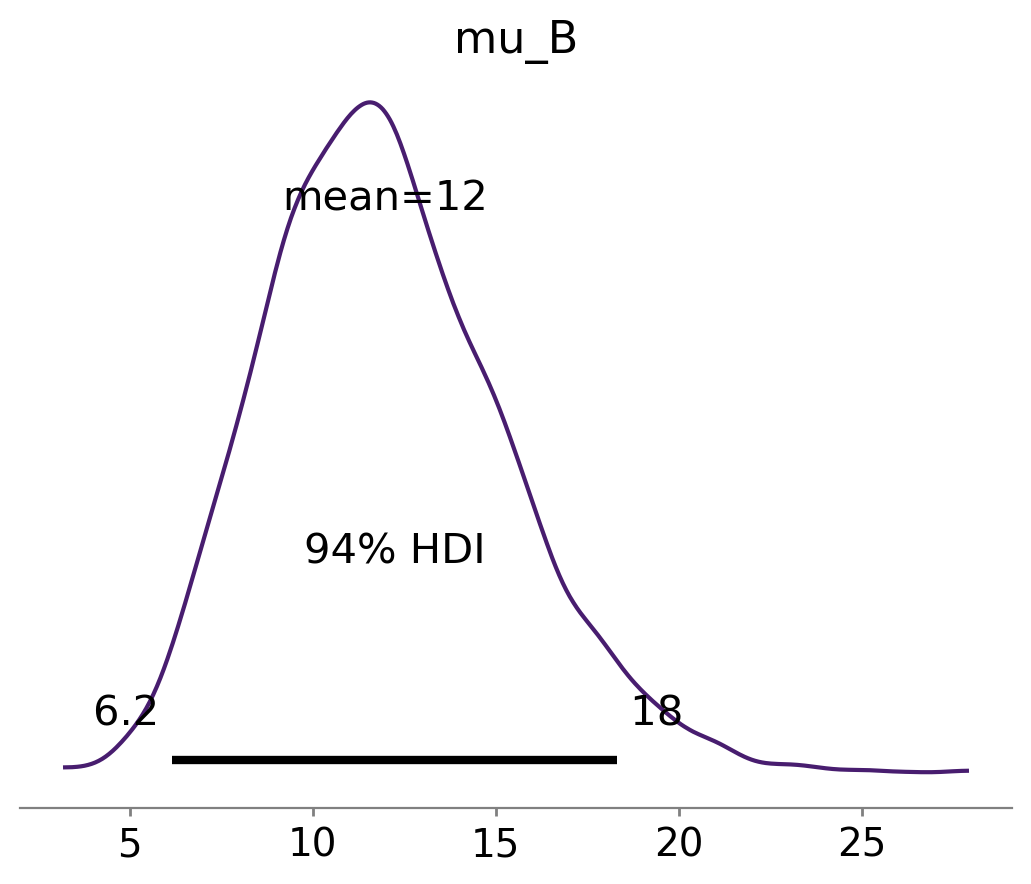

In [13]:
az.plot_posterior(mu_A)
az.plot_posterior(mu_B);

In [14]:
(mu_B > mu_A).mean()

<xarray.DataArray ()> Size: 8B
array(0.807875)

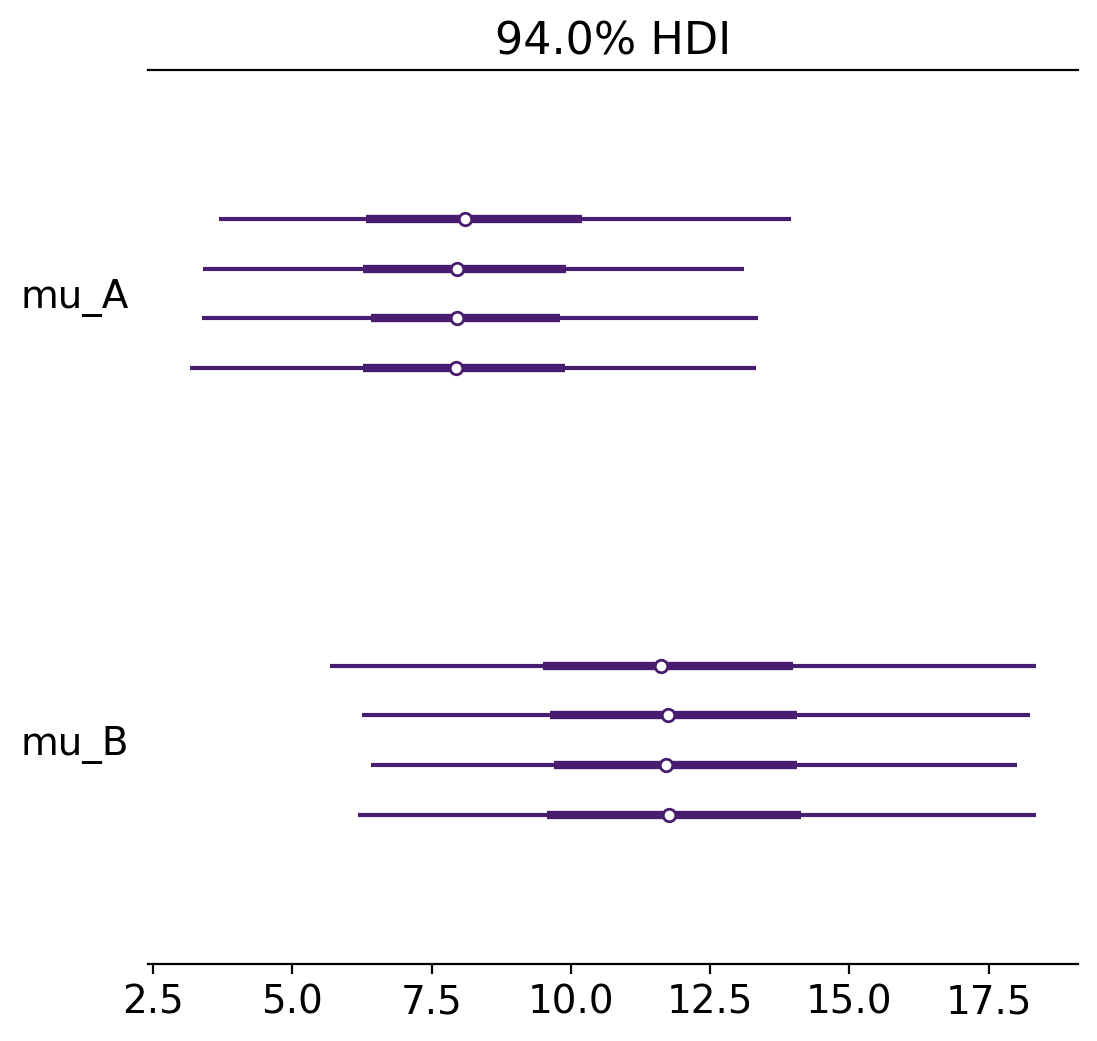

In [15]:
_ = az.plot_forest(idata3, var_names=["mu_A", "mu_B"])

In [16]:
with model3:
    post_pred = pm.sample_posterior_predictive(idata3)

Sampling: [episodes_A, episodes_B]


Output()

In [17]:
post_pred

Inference data with groups:
	> posterior_predictive
	> observed_data

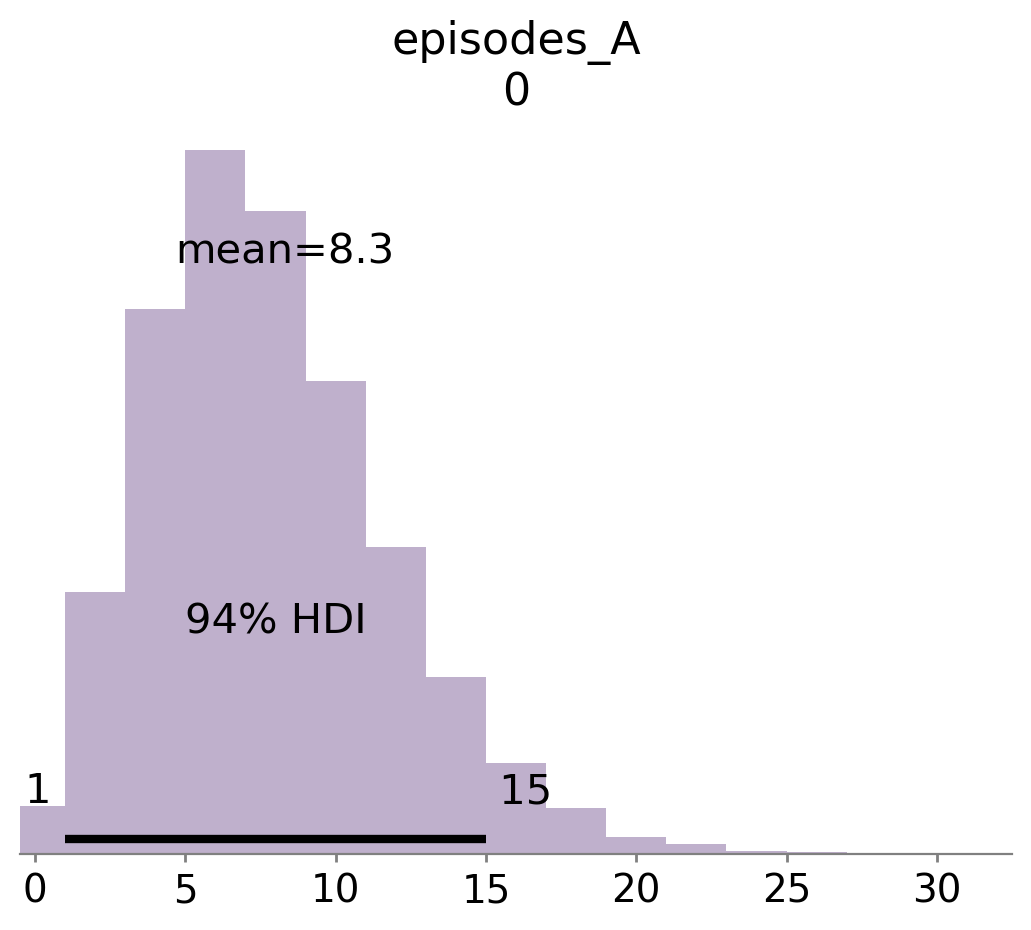

In [18]:
_ = az.plot_posterior(post_pred.posterior_predictive.episodes_A, hdi_prob=0.94)

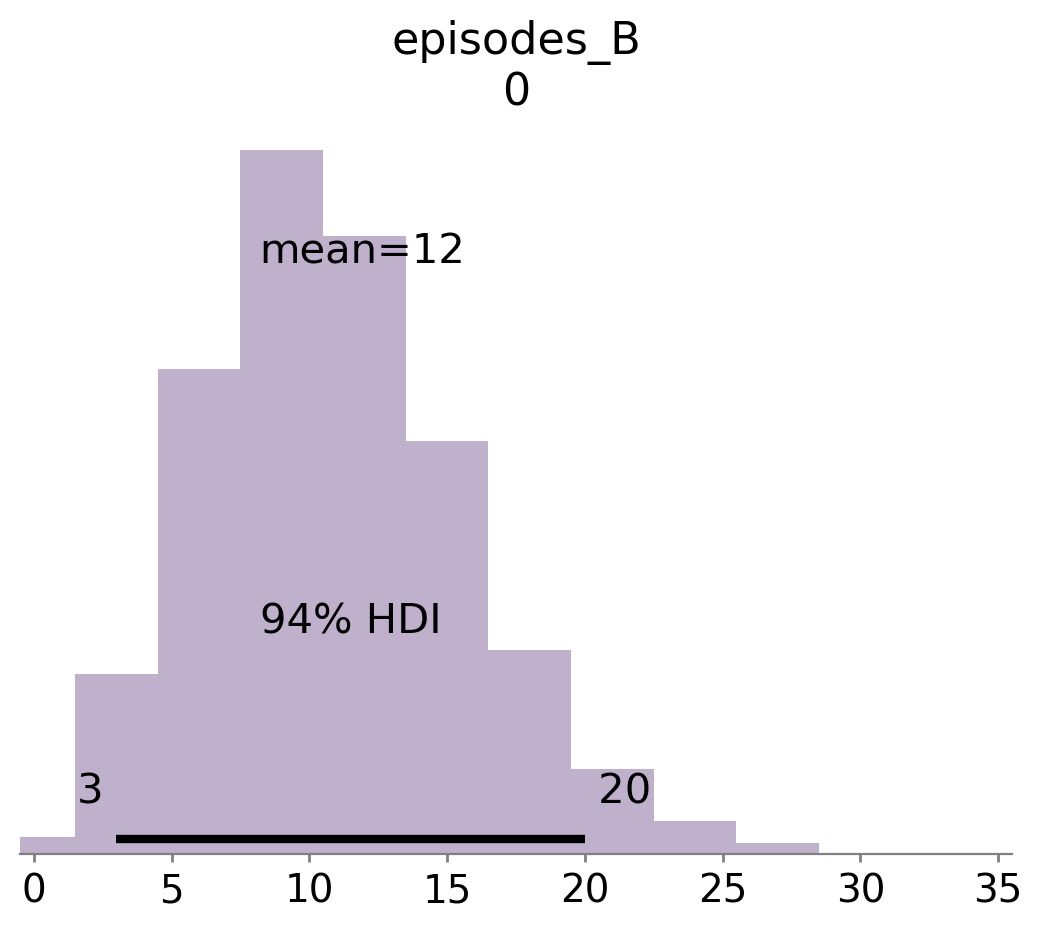

In [19]:
_ = az.plot_posterior(post_pred.posterior_predictive.episodes_B, hdi_prob=0.94)


In [20]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

xarray    : 2024.5.0
seaborn   : 0.13.2
arviz     : 0.18.0
pymc      : 5.15.1
scipy     : 1.13.1
matplotlib: 3.8.4
numpy     : 1.26.4
pandas    : 2.2.2

Watermark: 2.4.3

